In [86]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf
import keras
from sklearn.preprocessing import StandardScaler
from sklearn import cluster
from sklearn.cluster import AgglomerativeClustering
sns.set()

Populating the interactive namespace from numpy and matplotlib


In [20]:
file = "drone_delivery_v1.csv"
sep = ";"
data = pd.read_csv(file, sep)

In [21]:
data.describe()

,clientid,x,y
count,5956.000000,5956.000000,5956.000000
mean,2978.500000,508.823177,427.554772
std,1719.493433,271.061462,289.044640
min,1.000000,0.017692,0.043285
25%,1489.750000,282.582920,170.079921
50%,2978.500000,518.100892,397.786441
75%,4467.250000,727.156497,669.982518
max,5956.000000,999.533215,999.731720


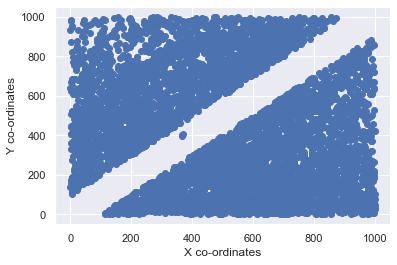

In [22]:
plt.scatter(data['x'],data['y'])
plt.xlabel('X co-ordinates')
plt.ylabel('Y co-ordinates')
plt.show()

In [23]:
num_clusters = 3

In [24]:
data

,clientid,x,y
0,1,622.771572,164.857623
1,2,416.357298,630.193634
2,3,292.735020,567.333231
3,4,737.211288,166.225676
4,5,540.475375,682.912298
...,...,...,...
5951,5952,832.857394,616.861410
5952,5953,242.734500,490.325092
5953,5954,108.690847,758.833921
5954,5955,803.251074,430.740623


In [25]:
#Drop clientid numbers

data.drop(columns=['clientid'], inplace=True)
data

,x,y
0,622.771572,164.857623
1,416.357298,630.193634
2,292.735020,567.333231
3,737.211288,166.225676
4,540.475375,682.912298
...,...,...
5951,832.857394,616.861410
5952,242.734500,490.325092
5953,108.690847,758.833921
5954,803.251074,430.740623


In [26]:
#is it needed?
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data))
data_scaled.head()  

,0,1
0,0.420414,-0.908923
1,-0.341154,0.701123
2,-0.797259,0.483628
3,0.842640,-0.904189
4,0.116781,0.883528


In [43]:
#kmeans = cluster.KMeans(n_clusters=num_clusters)
#kmeans.fit(data_scaled)

#centroids = kmeans.cluster_centers_
#print(centroids)

[[-1.15927977 -0.05180748]
 [ 0.69204104 -0.76357343]
 [ 0.25388538  1.23399367]]


In [74]:
%%time
kmeans = cluster.KMeans(n_clusters=num_clusters)
kmeans.fit(data)

centroids = kmeans.cluster_centers_
print(centroids)

[[199.19110736 381.36803221]
 [702.97853783 211.8465183 ]
 [546.90113596 787.51993197]]
Wall time: 138 ms


In [44]:
#centroids_data = pd.DataFrame(centroids, columns=['x','y'])
#print(centroids_data)

          x         y
0 -1.159280 -0.051807
1  0.692041 -0.763573
2  0.253885  1.233994


In [28]:
centroids_data = pd.DataFrame(centroids, columns=['x','y'])
print(centroids_data)

            x           y
0  702.970144  211.719080
1  547.004392  787.368221
2  199.191107  381.368032


In [29]:
centroids_data.describe()

,x,y
count,3.000000,3.000000
mean,483.055214,460.151778
std,257.905898,295.800849
min,199.191107,211.719080
25%,373.097750,296.543556
50%,547.004392,381.368032
75%,624.987268,584.368126
max,702.970144,787.368221


In [30]:
data_with_clusters = data.copy()
data_with_clusters['Cluseter(x)']=centroids_data['x']
data_with_clusters['Cluseter(y)']=centroids_data['y']

In [32]:
data_with_clusters

,x,y,Cluseter(x),Cluseter(y)
0,622.771572,164.857623,702.970144,211.719080
1,416.357298,630.193634,547.004392,787.368221
2,292.735020,567.333231,199.191107,381.368032
3,737.211288,166.225676,NaN,NaN
4,540.475375,682.912298,NaN,NaN
...,...,...,...,...
5951,832.857394,616.861410,NaN,NaN
5952,242.734500,490.325092,NaN,NaN
5953,108.690847,758.833921,NaN,NaN
5954,803.251074,430.740623,NaN,NaN


In [37]:
ident_clusters = kmeans.fit_predict(data)
ident_clusters

array([0, 2, 1, ..., 1, 0, 0])

In [63]:
data_with_ident_clusters = data.copy()
data_with_ident_clusters['cluster group'] = ident_clusters
data_with_ident_clusters

,x,y,cluster group
0,622.771572,164.857623,0
1,416.357298,630.193634,2
2,292.735020,567.333231,1
3,737.211288,166.225676,0
4,540.475375,682.912298,2
...,...,...,...
5951,832.857394,616.861410,2
5952,242.734500,490.325092,1
5953,108.690847,758.833921,1
5954,803.251074,430.740623,0


In [64]:
new_data_with_coordinates = data_with_ident_clusters.copy()

In [70]:
#replacing cluster group number with the actual coordinates

a1 = new_data_with_coordinates['cluster group'].replace(0,702.970144)
a2 = a1.replace(1,547.004392) 
a3 = a2.replace(2,199.191107)

b1 = new_data_with_coordinates['cluster group'].replace(0,211.719080)
b2 = b1.replace(1,787.368221)
b3 = b2.replace(2,381.368032)

In [104]:
new_data_with_coordinates = data_with_ident_clusters.copy()
new_data_with_coordinates['closest(x)'] = a3
new_data_with_coordinates['closest(y)'] = b3
new_data_with_coordinates.head(10)

,x,y,cluster group,closest(x),closest(y)
0,622.771572,164.857623,0,702.970144,211.719080
1,416.357298,630.193634,2,199.191107,381.368032
2,292.735020,567.333231,1,547.004392,787.368221
3,737.211288,166.225676,0,702.970144,211.719080
4,540.475375,682.912298,2,199.191107,381.368032
5,535.469492,318.439661,0,702.970144,211.719080
6,640.380050,870.833221,2,199.191107,381.368032
7,235.772075,359.048203,1,547.004392,787.368221
8,481.896884,661.491838,2,199.191107,381.368032
9,730.032789,312.177817,0,702.970144,211.719080


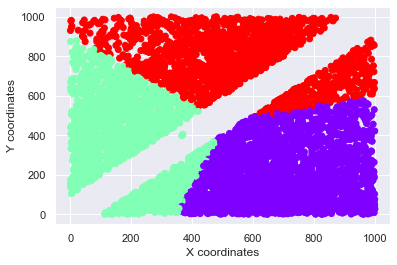

In [108]:
plt.scatter(new_data_with_coordinates['x'], new_data_with_coordinates['y'],c =new_data_with_coordinates['cluster group'], cmap = 'rainbow')
plt.xlabel('X coordinates')
plt.ylabel('Y coordinates')
plt.show()

In [79]:
##Same method, but with 10 Clusters

In [81]:
num_clusters1 = 10

In [76]:
file = "drone_delivery_v1.csv"
sep = ";"
df = pd.read_csv(file, sep)

In [80]:
df.drop(columns=['clientid'], inplace=True)

In [83]:
%%time  #it took on around 400 ms more time => as more clusters as more time it takes for computation
kmeans1 = cluster.KMeans(n_clusters=num_clusters1)
kmeans1.fit(df)

centroids_df = kmeans1.cluster_centers_
print(centroids_df)

[[310.93880845  86.6382827 ]
 [631.04770144 894.47704029]
 [848.33264313 127.35478668]
 [108.61682383 336.81928258]
 [744.69319955 409.01465678]
 [206.89876154 531.11573093]
 [548.93914047 177.08868363]
 [176.92669635 828.05262382]
 [448.94411285 739.4311826 ]
 [883.08382057 645.01768205]]
Wall time: 577 ms


In [94]:
##agglomerative hierarchical clustering with 3 depots

In [89]:
clustering = AgglomerativeClustering(n_clusters = 3).fit(data)

In [91]:
agglom_clusters = clustering.labels_

In [92]:
data_with_AgglomerativeClustering = data_with_ident_clusters.copy()
data_with_AgglomerativeClustering['agglom_clusters'] = agglom_clusters
data_with_AgglomerativeClustering

,x,y,cluster group,agglom_clusters
0,622.771572,164.857623,0,0
1,416.357298,630.193634,2,2
2,292.735020,567.333231,1,2
3,737.211288,166.225676,0,0
4,540.475375,682.912298,2,1
...,...,...,...,...
5951,832.857394,616.861410,2,1
5952,242.734500,490.325092,1,2
5953,108.690847,758.833921,1,2
5954,803.251074,430.740623,0,1


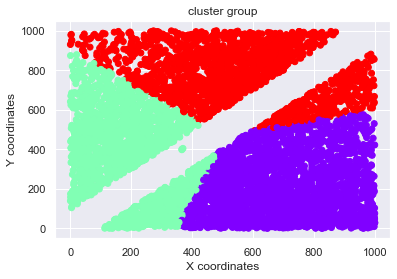

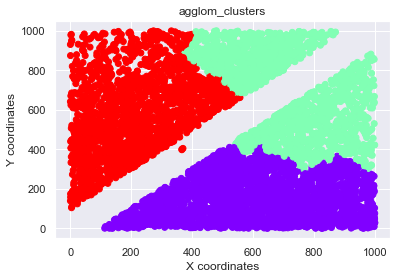

In [112]:
plt.scatter(data_with_AgglomerativeClustering['x'], data_with_AgglomerativeClustering['y'],c =data_with_AgglomerativeClustering['cluster group'], cmap = 'rainbow')
plt.xlabel('X coordinates')
plt.ylabel('Y coordinates')
plt.title('cluster group')
plt.show()
plt.scatter(data_with_AgglomerativeClustering['x'], data_with_AgglomerativeClustering['y'],c =data_with_AgglomerativeClustering['agglom_clusters'], cmap = 'rainbow')
plt.xlabel('X coordinates')
plt.ylabel('Y coordinates')
plt.title('agglom_clusters')
plt.show()

In [95]:
##agglomerative hierarchical clustering with 10 depots

In [102]:
clustering10 = AgglomerativeClustering(n_clusters = 10).fit(data)

In [103]:
agglom_clusters10 = clustering10.labels_
data_with_AgglomerativeClustering10 = data_with_ident_clusters.copy()
data_with_AgglomerativeClustering10['agglom_clusters10'] = agglom_clusters10
data_with_AgglomerativeClustering10

,x,y,cluster group,agglom_clusters10
0,622.771572,164.857623,0,3
1,416.357298,630.193634,2,0
2,292.735020,567.333231,1,0
3,737.211288,166.225676,0,3
4,540.475375,682.912298,2,4
...,...,...,...,...
5951,832.857394,616.861410,2,9
5952,242.734500,490.325092,1,0
5953,108.690847,758.833921,1,2
5954,803.251074,430.740623,0,7


In [ ]:
#As more clusters there are as more time it takes for computation. There is slight difference between the results 
#of k-means and agglomerative hierarchical clustering. Yet the graphs show a big difference in some areas.